pip install dataprep

## Global Youtube Statistic Analysis

### I. Introduction

In today's digital era, YouTube has transcended its origins as a platform for user-generated content to become a global phenomenon, revolutionizing the way we consume information and entertainment. With an ever-expanding universe of creators, audiences, and content, YouTube is a dynamic ecosystem that shapes modern media, entertainment, and marketing landscapes. This analysis endeavors to explore the multifaceted world of YouTube through a comprehensive dataset, which includes details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more.

The significance of this endeavor lies in unraveling the secrets behind YouTube's immense success, the strategies employed by top creators, and the emerging trends that influence content creation and audience engagement. By leveraging this rich dataset, we aim to provide actionable insights that can drive decision-making, foster innovation, and enable stakeholders to tap into the full potential of the YouTube platform.

### II. Analysis

1. Business Objective/Problem

Through the dataset including top 10 Youtubers in the world, we will conduct a deep explorationary data analysis to get insights that can help us give the best answers to the following business questions and satisfy our business objectives:

What are top 10 Youtubers who have the highest amount of views?

Does it mean that a Youtube channel owning a high number of subscribers is associated with a high amount of views?

Does it mean that a Youtube channel owning a high total of uploads will lead to a high number of subscribers and amount of views

What are some categories of Youtube channels which have the most uploads?

How many channels are there in each category?

What are some Youtube user trends throughout the number of subscribers and the amount of views in each category?

What are some interesting interaction and behaviors of users in those catgories. (measured by total views of per user)

Do the contents or keywords in each Youtube Channel's Title affect the amount of views?

What countries do those top 10 youtubers come from?

9.1 What is the unemployment rate?
9.2 What is the rate of high education attainment of each country?
9.3 What is the rate of urban population in each country?

When were most successful Youtube Channel created ?

What are the trending content creactivity of each chanel over the time?

What is the posibility of generating average earnings per month in each category?

Does it mean that a higher amount of views will lead to a higher earning?

2. Data Preparing

Key Features: Rank: Position of the YouTube channel based on the number of subscribers Youtuber

Population: Name of the YouTube channel

subscribers: Number of subscribers to the channel

video views : Total views across all videos on the channel

category : Category or niche of the channel

Title : Title of the YouTube channel

uploads : Total number of videos uploaded on the channel

Country : Country where the YouTube channel originates

Abbreviation : Abbreviation of the country

channel_type : Type of the YouTube channel (e.g., individual, brand)

video_views_rank : Ranking of the channel based on total video views

country_rank : Ranking of the channel based on the number of subscribers within its country

channel_type_rank : Ranking of the channel based on its type (individual or brand)

video_views_for_the_last_30_days : Total video views in the last 30 days

lowest_monthly_earnings : Lowest estimated monthly earnings from the channel

highest_monthly_earnings : Highest estimated monthly earnings from the channel

lowest_yearly_earnings : Lowest estimated yearly earnings from the channel

highest_yearly_earnings : Highest estimated yearly earnings from the channel

subscribers_for_last_30_days : Number of new subscribers gained in the last 30

days created_year : Year when the YouTube channel was created

created_month : Month when the YouTube channel was created

created_date : Exact date of the YouTube channel's creation

Gross tertiary education enrollment (%) : Percentage of the population enrolled in tertiary education in the country

Population: Total population of the country

Unemployment rate : Unemployment rate in the country

Urban_population : Percentage of the population living in urban areas

Latitude : Latitude coordinate of the country's location

Longitude : Longitude coordinate of the country's location

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from dataprep.datasets import load_dataset
from dataprep.eda import create_report, plot 
import scipy 
import warnings 
warnings.filterwarnings('ignore') 
from dataprep.clean import clean_headers 
from scipy import stats 
import re 
from wordcloud import WordCloud, STOPWORDS 
np.set_printoptions(suppress=True)


In [23]:
data = pd.read_csv('Documents/Data Analytics Projects/Global YouTube Statistics.csv', encoding='latin-1') #'ISO-8859-1'

In [24]:
data.reset_index(drop= True, inplace= True)

In [25]:
data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [26]:
data.shape

(995, 28)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [28]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [29]:
#clean columns in the dataset 
data.columns = data.columns.str.replace('_',' ') 
data.columns = data.columns.str.title() 
data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

3. Select variables to analyst

In [30]:

youtube = data[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings', 
                'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 
                'Population','Urban Population','Created Year']]

youtube.head(10)

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,YouTube Movies,170000000,0.000000e+00,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,3.282395e+08,270663028.0,2006.0
2,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,3.282395e+08,270663028.0,2012.0
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,3.282395e+08,270663028.0,2006.0
4,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
5,Music,119000000,0.000000e+00,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
6,ýýý Kids Diana Show,112000000,9.324704e+10,1111,People & Blogs,United States,US,182900.0,2900000.00,88.2,14.70,3.282395e+08,270663028.0,2015.0
7,PewDiePie,111000000,2.905804e+10,4716,Gaming,Japan,JP,9800.0,156700.00,63.2,2.29,1.262266e+08,115782416.0,2010.0
8,Like Nastya,106000000,9.047906e+10,493,People & Blogs,Russia,RU,12200.0,195800.00,81.9,4.59,1.443735e+08,107683889.0,2016.0
9,Vlad and Niki,98900000,7.718017e+10,574,Entertainment,United States,US,145100.0,2300000.00,88.2,14.70,3.282395e+08,270663028.0,2018.0


In [31]:
youtube.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category',
       'Country', 'Abbreviation', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)',
       'Unemployment Rate', 'Population', 'Urban Population', 'Created Year'],
      dtype='object')

In [32]:
#Remove data null in column 'Created Year' 
youtube = youtube.dropna(subset= ['Created Year'])

youtube['Created Year'] = youtube['Created Year'].astype('object')

# youtube.info() 
# youtube['Created Year'] = pd.to_datetime(youtube['Created Year'], format= '%Y') 
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 990 non-null    object 
 1   Subscribers                              990 non-null    int64  
 2   Video Views                              990 non-null    float64
 3   Uploads                                  990 non-null    int64  
 4   Category                                 944 non-null    object 
 5   Country                                  870 non-null    object 
 6   Abbreviation                             870 non-null    object 
 7   Lowest Monthly Earnings                  990 non-null    float64
 8   Highest Monthly Earnings                 990 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  869 non-null    float64
 10  Unemployment Rate                        869 non-n

In [33]:
#Check Created Year data 
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [34]:
#Check Created Year is 1970 
youtube[youtube['Created Year'] == 1970]

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
101,YouTube,36300000,3.010785e+09,744,News & Politics,United States,US,5300.0,84400.0,88.2,14.7,328239523.0,270663028.0,1970.0


Youtube was established on February 14, 2005. I can see a mistake in the process of establishing this Youtube channel.

This may be the channel representing the Youtube platform, I will temporarily replace the data from the time this channel was established until the day Youtube was born.

In [35]:
youtube[youtube['Youtuber'] == 'YouTube'] = youtube[youtube['Youtuber'] == 'YouTube'].replace(1970, 2005)

youtube[youtube['Youtuber'] == 'YouTube']

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
101,YouTube,36300000,3.010785e+09,744,News & Politics,United States,US,5300.0,84400.0,88.2,14.7,328239523.0,270663028.0,2005


In [36]:
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       2019.0, 2022.0], dtype=object)

In [37]:
#After remomved characters, we will remove some blanks data in column 'Youtuber'. Let's check it 
blanks_data_youtuber = youtube[youtube['Youtuber'] == ''] 
blanks_data_youtuber

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year


In [38]:
# Remove rows from with blank Youtuber as these are channels with only special characters 
youtube = youtube.drop(blanks_data_youtuber.index) 
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Youtuber'] == '']

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year


In [39]:
#Check duplicate data 
youtube.duplicated().sum()

0

In [41]:
#Check zero data video views 
zero_views = youtube[youtube['Video Views'] == 0] 
zero_views

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
1,YouTube Movies,170000000,0.0,1,Film & Animation,United States,US,0.0,0.05,88.2,14.7,328239523.0,270663028.0,2006.0
5,Music,119000000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
12,Gaming,93600000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
18,Sports,75000000,0.0,3,NaN,United States,US,0.0,0.06,88.2,14.7,328239523.0,270663028.0,2006.0
102,News,36300000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
173,Popular on YouTube,29300000,0.0,3,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2017.0
359,Minecraft - Topic,20900000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
589,Live,16100000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2015.0


There are some YouTube channels which have 0 views, which appear to be YouTube topics & not valid channels, for the purpose of this analysis these rows will be removed

In [42]:
#Remove zero data video views 
youtube = youtube.drop(zero_views.index) 
youtube.reset_index(drop= True, inplace= True) 
youtube[youtube['Video Views'] == 0]

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year


In [43]:
youtube.shape

(982, 14)

In [44]:
#Check null/nan data 
youtube.isnull().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                    39
Country                                    114
Abbreviation                               114
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [45]:
#There are lots of missing value in the category variables 
#We will group all missing values to 'Other'

#Select category columns 
categorical_variables = youtube.select_dtypes(include= 'O').columns

#Replace object datatype column missing values with 'Other' 
youtube[categorical_variables] = youtube[categorical_variables].fillna('Other')

In [46]:
#check missing value
youtube.isna().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                     0
Country                                      0
Abbreviation                                 0
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [47]:
#check missing value 
youtube.isna().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                     0
Country                                      0
Abbreviation                                 0
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [48]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    float64
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  867 non-null    float64
 10  Unemployment Rate                        867 non-n

In [50]:
#Youtube is not null
youtube_not_null = youtube.dropna(subset= ['Gross Tertiary Education Enrollment (%)','Unemployment Rate', 'Population', 'Urban Population'])

In [51]:
#Mean Education Enrollment
mean_edu = round(youtube_not_null['Gross Tertiary Education Enrollment (%)'].mean(),1) 
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate 
mean_unemp = round(youtube_not_null['Unemployment Rate'].mean(),1) 
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population 
mean_popu = round(youtube_not_null['Population'].mean(),0) 
print('Mean Population:', mean_popu)

#Mean Urban Population 
mean_urban = round(youtube_not_null['Urban Population'].mean(),0) 
print('Mean Urban Population:', mean_urban)

Mean Gross Tertiary Education Enrollment: 63.5
Mean Unemployment Rate: 9.3
Mean Population: 431458653.0
Mean Urban Population: 224334935.0


In [52]:
#There are lots of missing value in the numeric variables #Replace object datatype column missing values with Mean Values youtube['Gross Tertiary Education Enrollment (%)'] = youtube['Gross Tertiary Education Enrollment (%)'].fillna(mean_e

youtube['Unemployment Rate'] = youtube['Unemployment Rate'].fillna(mean_unemp)

youtube['Population'] = youtube['Population'].fillna(mean_popu)

youtube['Urban Population'] = youtube['Urban Population'].fillna(mean_urban)

In [53]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    float64
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  867 non-null    float64
 10  Unemployment Rate                        982 non-n

In [55]:
# Convert several float data typescolumns to integars 
youtube = youtube.astype({ 'Video Views': 'int64', 
                          'Created Year': 'int64', 
                          'Population': 'int64', 
                          'Urban Population': 'int64' })

# Validate results of datatype change 
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    int64  
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  867 non-null    float64
 10  Unemployment Rate                        982 non-n

In [56]:
#sorting the dataframe and resetting index (by 'Subscribers)
youtube = youtube.sort_values(by = 'Subscribers', ascending= False).reset_index(drop= True) 
youtube

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,228000000000,20082,Music,India,IN,564600.0,9000000.0,28.1,5.36,1366417754,471031528,2006
1,MrBeast,166000000,28368841870,741,Entertainment,United States,US,337000.0,5400000.0,88.2,14.70,328239523,270663028,2012
2,Cocomelon - Nursery Rhymes,162000000,164000000000,966,Education,United States,US,493800.0,7900000.0,88.2,14.70,328239523,270663028,2006
3,SET India,159000000,148000000000,116536,Shows,India,IN,455900.0,7300000.0,28.1,5.36,1366417754,471031528,2006
4,ýýý Kids Diana Show,112000000,93247040539,1111,People & Blogs,United States,US,182900.0,2900000.0,88.2,14.70,328239523,270663028,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Natan por Aï¿,12300000,9029609749,1200,Sports,Brazil,BR,138100.0,2200000.0,51.3,12.08,212559417,183241641,2017
978,Free Fire India Official,12300000,1674409945,1500,People & Blogs,India,IN,16200.0,258900.0,28.1,5.36,1366417754,471031528,2018
979,Panda,12300000,2214684303,2452,Other,United Kingdom,GB,17.0,268.0,60.0,3.85,66834405,55908316,2006
980,RobTopGames,12300000,374123483,39,Gaming,Sweden,SE,968.0,15500.0,67.0,6.48,10285453,9021165,2012


In [58]:
#we create a new file that contains our clean dataset 
youtube.to_csv('Global_Youtube_Statistics_2023_new.csv', index = False)

## 5. Exploratory Data Analysis

In [59]:
youtube_color_barchart_10 = ['#f00000','#ff2424','#ff3838','#ff554f','#fb7571','#cccccc','#b6b6b6','#9e9e9e','#888888']

youtube_color_donutchart = ['#f00000', '#ff3838', '#fb7571','#cccccc','#b6b6b6','#9e9e9e','#777777']

youtube_color_barchart_freestyle1 = ['#f00000', '#f00000', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777']
youtube_color_barchart_freestyle2 = ['#FE0000','#F4E0B9','#A8A196','#7D7463']

youtube_color_barchart_freestyle3 = ['#f00000', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777']

#### Correlation of Numeric Variables

In [60]:
#Statistics correlation table
correlation = youtube.corr() 
correlation

,Subscribers,Video Views,Uploads,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
Subscribers,1.000000,0.824174,0.088540,0.428528,0.428144,-0.018953,-0.022404,0.086179,0.081013,-0.134729
Video Views,0.824174,1.000000,0.164407,0.550703,0.550058,-0.012451,0.001517,0.077742,0.075256,-0.139450
Uploads,0.088540,0.164407,1.000000,0.165461,0.165822,-0.217856,-0.187058,0.141970,0.072369,-0.165089
Lowest Monthly Earnings,0.428528,0.550703,0.165461,1.000000,0.999955,-0.059825,-0.039307,0.098667,0.076990,0.071728
Highest Monthly Earnings,0.428144,0.550058,0.165822,0.999955,1.000000,-0.059606,-0.039074,0.098649,0.077016,0.071696
Gross Tertiary Education Enrollment (%),-0.018953,-0.012451,-0.217856,-0.059825,-0.059606,1.000000,0.673792,-0.573477,-0.299524,-0.159348
Unemployment Rate,-0.022404,0.001517,-0.187058,-0.039307,-0.039074,0.673792,1.000000,-0.218089,0.140554,-0.116527
Population,0.086179,0.077742,0.141970,0.098667,0.098649,-0.573477,-0.218089,1.000000,0.909877,0.112620
Urban Population,0.081013,0.075256,0.072369,0.076990,0.077016,-0.299524,0.140554,0.909877,1.000000,0.075162
Created Year,-0.134729,-0.139450,-0.165089,0.071728,0.071696,-0.159348,-0.116527,0.112620,0.075162,1.000000


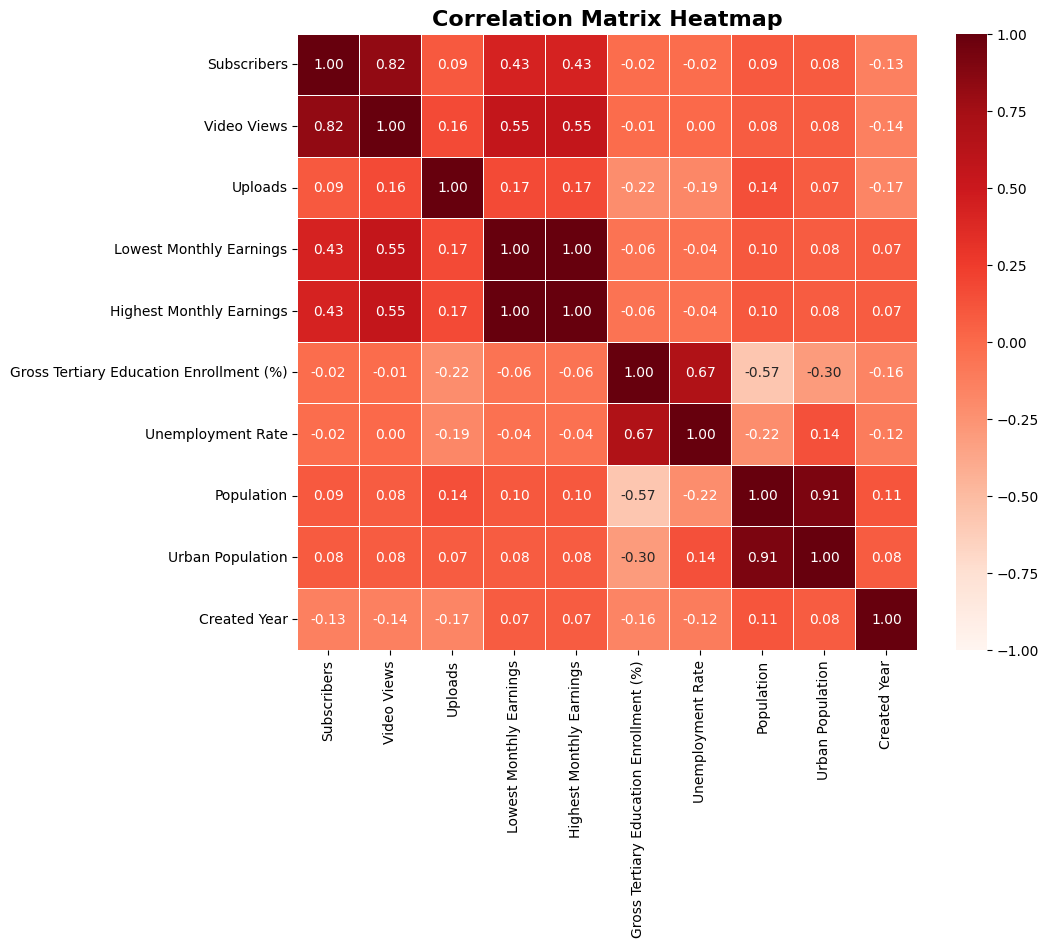

In [61]:
#Visualization heatmap

plt.figure(figsize= (10,8)) 
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16) 
sb.heatmap(correlation, annot= True,

cmap= 'Reds',

vmin= -1, vmax= 1,

linecolor = 'white', linewidths = 0.5,

fmt = '.2f'
)

plt.show()

There is high correlation between attributes, particularly the high correlation between Subscribers and Video Views.
However, these two attributes has moderate-to-low correlation with other attributes, even no correlation with Uploads
Two variables Lowest Monthly Earnings and Highest Monthly Earnings are highly correlated (100%).

## 1. What are top 10 Youtubers who have the most subscribers and top 10 Youtubers who have the highest amount of views?

In [66]:
#Statistics by Subscribers #Select columns to show output

select_columns = ['Youtuber', 'Subscribers']

#Filter dataframe for top 10 most subscribers Youtuber channels 
top_10_subs = youtube[select_columns].head(10)

#Convert 'Subscriber' in millions 

top_10_subs['Subscribers (million)'] = (top_10_subs['Subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber','Subscribers (million)']]

#Show dataframe 
top_10_subs

,Youtuber,Subscribers (million)
0,T-Series,245
1,MrBeast,166
2,Cocomelon - Nursery Rhymes,162
3,SET India,159
4,ýýý Kids Diana Show,112
5,PewDiePie,111
6,Like Nastya,106
7,Vlad and Niki,98
8,Zee Music Company,96
9,WWE,96


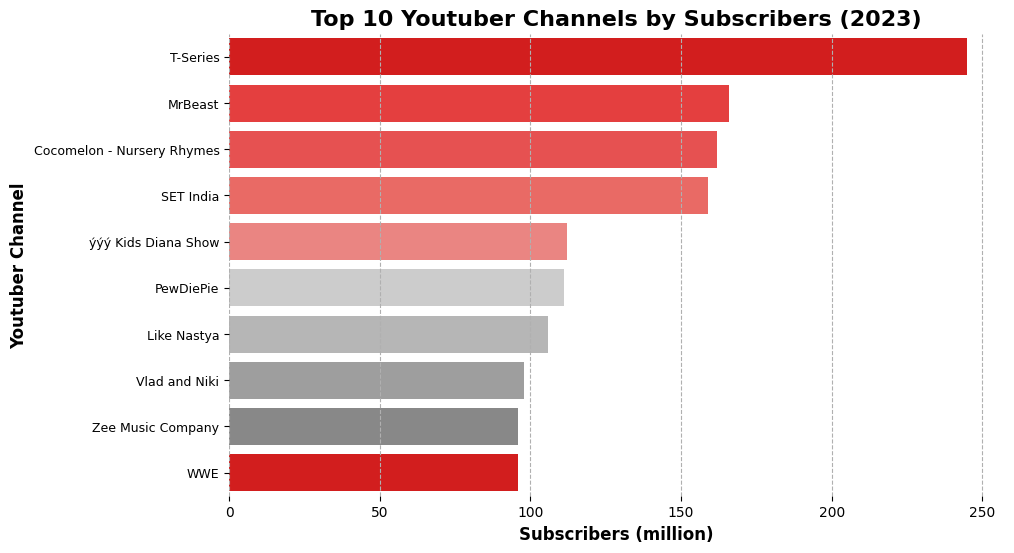

In [68]:
#Visualization 
plt.figure(figsize= (10,6)) 
plt.title('Top 10 Youtuber Channels by Subscribers (2023)',
          fontweight = 'heavy', fontsize = 16) 
sb.barplot(top_10_subs,x = 'Subscribers (million)' ,y = 'Youtuber', palette= youtube_color_barchart_10 ) 
plt.xlabel('Subscribers (million)',fontweight = 'heavy', fontsize = 12)

plt.ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
plt.yticks(size = 9) 
sb.despine(left=True, bottom=True) 
plt.grid(axis = 'x', linestyle ='--') 
plt.show()

In [122]:
#Statistics by Video Views 
#Select columns to show output

select_columns = ['Youtuber', 'Video Views']
#Filter dataframe for top 10 most video view Youtuber channels 
youtube_videoviews = youtube[select_columns] 
top_10_views = youtube_videoviews.sort_values(by = 'Video Views', ascending= False).head(10)
#Convert 'Video Views' in billions 
top_10_views['Video Views (billion)'] = (top_10_views['Video Views'] / 1000000000).astype('int') 
top_10_views = top_10_views[['Youtuber', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending = False)
#Show dataframe 
top_10_views

,Youtuber,Video Views (billion)
0,T-Series,228
2,Cocomelon - Nursery Rhymes,164
3,SET India,148
12,Sony SAB,101
4,ýýý Kids Diana Show,93
6,Like Nastya,90
9,WWE,77
7,Vlad and Niki,77
17,Zee TV,73
22,Colors TV,61


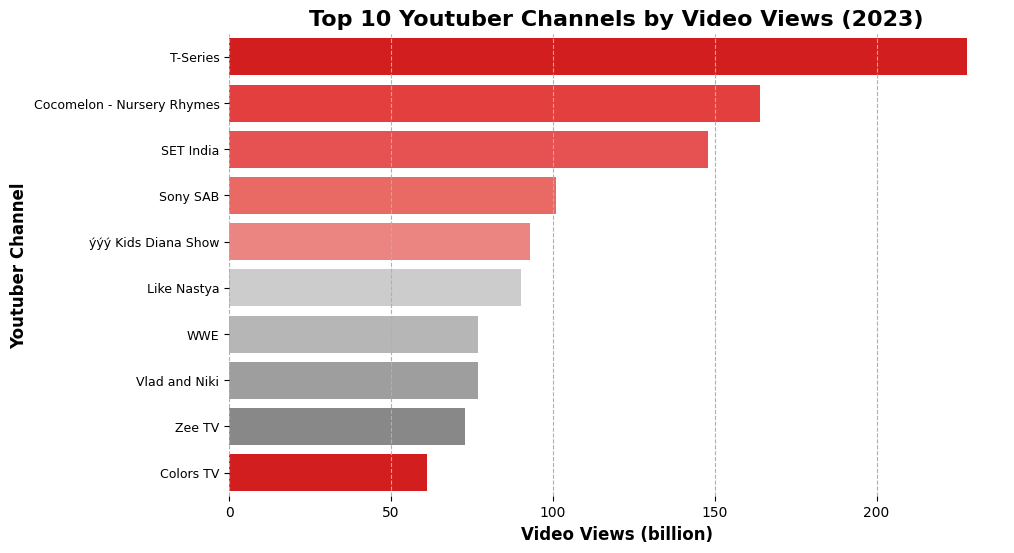

In [123]:
#Visualization
plt.figure(figsize= (10,6)) 
plt.title('Top 10 Youtuber Channels by Video Views (2023)',fontweight = 'heavy', fontsize = 16) 
sb.barplot(top_10_views,x = 'Video Views (billion)' ,y = 'Youtuber', palette= youtube_color_barchart_10 ) 
plt.xlabel('Video Views (billion)',fontweight = 'heavy', fontsize = 12)
plt.ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
plt.yticks(size = 9)
sb.despine(left=True, bottom=True) 
plt.grid(axis = 'x', linestyle ='--') 
plt.show()

## 2. Does it mean that a Youtube channel owning a high number of subscribers is associated with a high amount of views?

In [81]:
#Statistics Subscriber (million), Video Views (billion) & Uploads (k.) 
#Select columns to show output

select_columns = ['Youtuber', 'Subscribers', 'Video Views', 'Uploads']

#Filter dataframe by select_columns 
youtube_corr_statistics = youtube[select_columns] 
#Convert 'Subscriber' in millions 
youtube_corr_statistics['Subscribers (million)'] = (youtube_corr_statistics['Subscribers']/1000000).astype('int') 
#Convert 'Video Views' in millions 
youtube_corr_statistics['Video Views (billion)'] = (youtube_corr_statistics['Video Views']/1000000000).astype('int') 
#Convert 'Uploads' in thousand 
youtube_corr_statistics['Uploads (k.)'] = (youtube_corr_statistics['Uploads']/1000) 
youtube_corr_statistics = youtube_corr_statistics[['Youtuber', 'Subscribers (million)', 'Video Views (billion)', 'Uploads (k.)']] 
#Show dataframe 
youtube_corr_statistics.head()

,Youtuber,Subscribers (million),Video Views (billion),Uploads (k.)
0,T-Series,245,228,20.082
1,MrBeast,166,28,0.741
2,Cocomelon - Nursery Rhymes,162,164,0.966
3,SET India,159,148,116.536
4,ýýý Kids Diana Show,112,93,1.111


In [82]:
youtube_corr_statistics['Video Views (billion)'].mean()

10.65376782077393

In [83]:
youtube_corr_statistics['Subscribers (million)'].mean()

22.19246435845214

In [85]:
per_subs = round(np.percentile(youtube_corr_statistics['Subscribers (million)'], 95)) 
per_views = round(np.percentile(youtube_corr_statistics['Video Views (billion)'], 95))

print('95% youtube channels have the total Subscribers below:', per_subs, 'million') 
print('95% youtube channels have the total Subscribers above:', per_views, 'billion')

95% youtube channels have the total Subscribers below: 45 million
95% youtube channels have the total Subscribers above: 28 billion


Text(0, 0.5, 'Count')

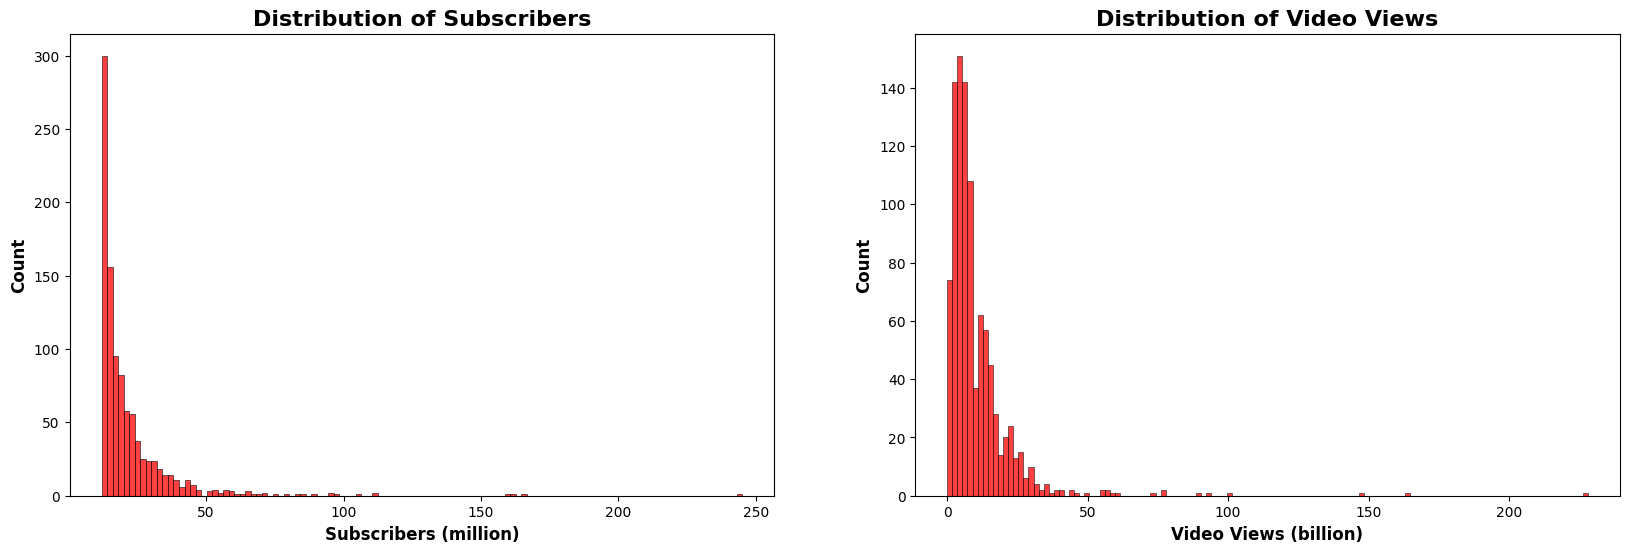

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,6)) 
sb.histplot(youtube_corr_statistics['Subscribers (million)'], color= 'red',ax = ax1)
ax1.set_title('Distribution of Subscribers', fontweight = 'heavy', fontsize = 16)
ax1.set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12) 
ax1.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
sb.histplot(youtube_corr_statistics['Video Views (billion)'], color= 'red', ax = ax2) 
ax2.set_title('Distribution of Video Views', fontweight = 'heavy', fontsize = 16) 
ax2.set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12) 
ax2.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)

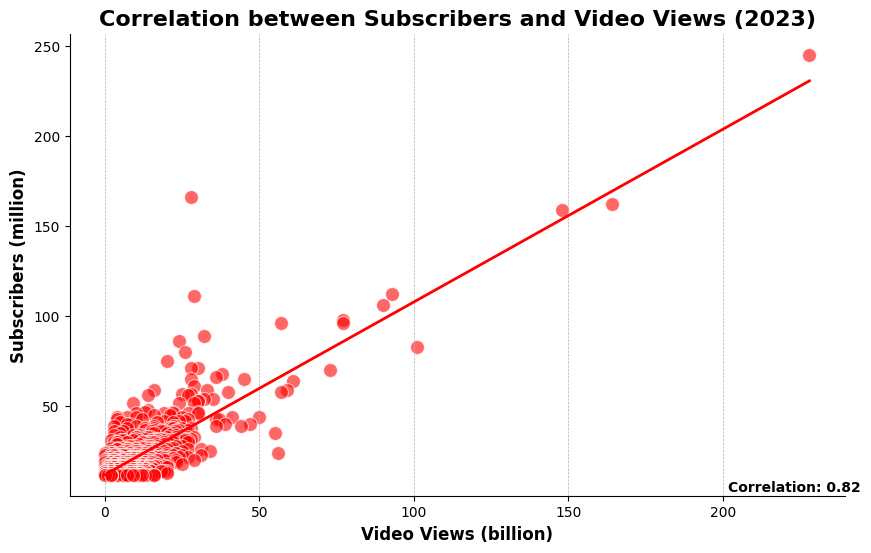

In [99]:
# Calculate the correlation coefficient 
correlation = youtube_corr_statistics['Subscribers (million)'].corr(youtube_corr_statistics['Video Views (billion)'])

# Set scaling factor of circle size 
scaling_factor = 2

# Calculate the size of circles 
sizes = youtube_corr_statistics['Video Views (billion)'] * scaling_factor

# Chart 
plt.figure(figsize= (10,6)) 
plt.title('Correlation between Subscribers and Video Views (2023)', fontweight = 'heavy', fontsize = 16 ) 
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Subscribers (million)', color = 'red', alpha = 0.6, s=100)
sb.regplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Subscribers (million)', scatter=False, ci=None, line_kws={"color": "red", "linestyle": "-", "linewidth": 2})
plt.xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12) 
plt.ylabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12) 
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

sb.despine(left=False, bottom=False) 
plt.grid(axis = 'y', linestyle ='') 
# Note correlation 
plt.annotate(f'Correlation: {correlation:.2f}', xy = (0.85, 0.01),
xycoords = 'axes fraction',
fontsize = 10, weight = 'bold')
plt.show()

From the correlation matrix table, Subscribers and Views have a high correlation rate up to 82%. The scatter plot chart shows in more detail the positive relationship between these two variables (the more subscribers a YouTube channel has, the more views it will have).
Looking at the scatter plot chart, the distribution of the majority of data is concentrated in a range significantly lower than the top 10 mentioned in question 1, while only a few channels have a larger number of subscribers and views than the rest. Specifically, through the histogram chart, the data shows that up to 95% of YouTube channels have less than 46 million subscribers and less than 28 billion views.

=> This leads to the conclusion that:

- In fact, there is a significant positive relationship between subscribers and views. At the same time, this also implies that only a few channels truly outperform the rest in terms of success (measured based on the number of Subscribers and Views).

- So the question is what factors contribute to the success of a YouTube channel?

## 3. Does it mean that a Youtube channel owning a high total of uploads will lead to a high number of subscribers and amount of views?

In [104]:
top_upload_channels = youtube[['Youtuber', 'Category', 'Uploads']].sort_values(by= 'Uploads', ascending= False).reset_index(drop=True).head(10)
top_upload_channels

,Youtuber,Category,Uploads
0,ABP NEWS,People & Blogs,301308
1,GMA Integrated News,News & Politics,296272
2,TV9 Bharatvarsh,People & Blogs,293516
3,Aaj Tak,News & Politics,283775
4,IndiaTV,News & Politics,273255
5,KOMPASTV,News & Politics,269050
6,Thairath Online,News & Politics,244899
7,News 24,News & Politics,211620
8,ABS-CBN News,News & Politics,209520
9,TEDx Talks,Nonprofits & Activism,200933


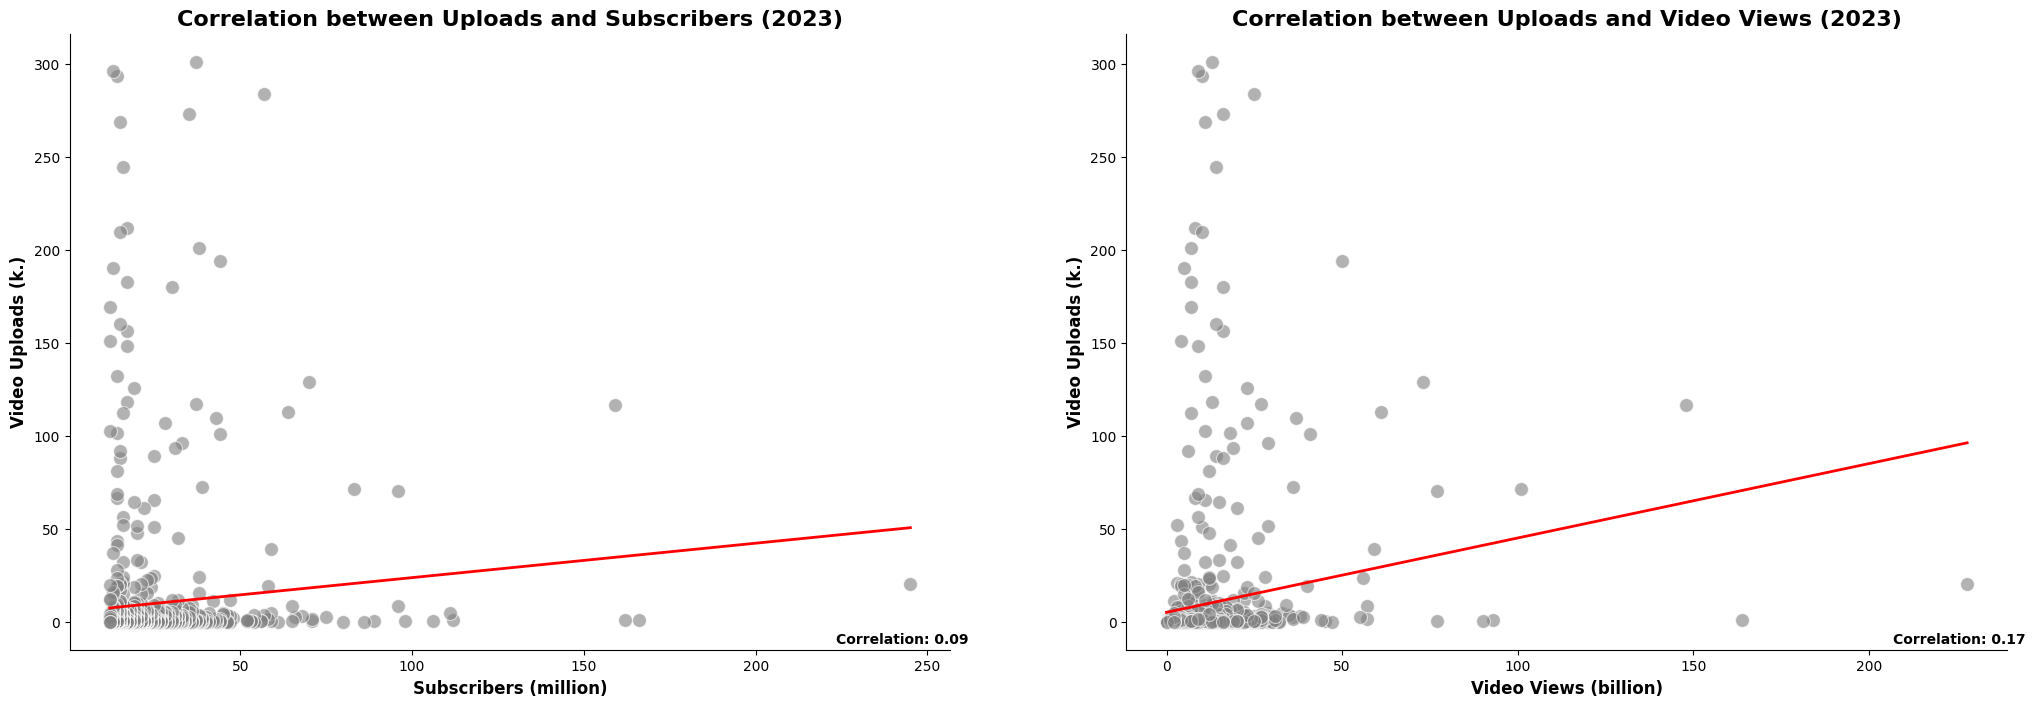

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [111]:
fig, ax = plt.subplots(1, 2, figsize = (25,8))

#Upload & Subscribers 
#Calculate the correlation coefficient 
correlation_ax0 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Subscribers (million)']) 
# Set scaling factor of circle size
scaling_factor_ax0 = 2 
# Calculate the size of circles 
sizes_ax0 = youtube_corr_statistics['Subscribers (million)'] * scaling_factor_ax0 
# Chart 
plt.figure(figsize= (10,6)) 
ax[0].set_title('Correlation between Uploads and Subscribers (2023)', fontweight = 'heavy', fontsize = 16 ) 
sb.scatterplot(data= youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', color = 'gray',alpha=0.6, s=100, ax=ax[0])
sb.regplot(data= youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', scatter=False, ci=None,line_kws={"color": "red", "linestyle": "-", "linewidth": 2}, ax=ax[0])
ax[0].set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12) 
ax[0].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[0].spines['top'].set_visible(False) #remove x-axis on the top
ax[0].spines['right'].set_visible(False) #remove x-axis on the right
# Note correlation 
ax[0].annotate(f'Correlation: {correlation_ax0:.2f}', xy = (0.87, 0.01), xycoords = 'axes fraction', fontsize = 10, weight = 'bold')

#Uploads & Video Views # Calculate the correlation coefficient 
correlation_ax1 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Video Views (billion)']) 
# Set scaling factor of circle size 
scaling_factor_ax1 = 2 
# Calculate the size of circles 
sizes_ax1 = youtube_corr_statistics['Video Views (billion)'] * scaling_factor 
# Chart 
plt.figure(figsize= (10,6)) 
ax[1].set_title('Correlation between Uploads and Video Views (2023)', fontweight = 'heavy', fontsize = 16 ) 
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', color = 'gray',alpha=0.6, s=100, ax=ax[1])
sb.regplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', scatter=False, ci=None, line_kws={"color": "red", "linestyle": "-", "linewidth": 2}, ax=ax[1])
ax[1].set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
# ax[1].grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
# Note correlation 
ax[1].annotate(f'Correlation: {correlation_ax1:.2f}', xy = (0.87, 0.01), xycoords = 'axes fraction', fontsize = 10, weight = 'bold') 
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
plt.show();

- With extremely low correlation rates (0.9% and 17% respectively) and inconsistent data dispersion, we can conclude that a YouTube channel with many uploads doesn't mean that the channel will receive more subscribers and views.
This implies that the quality and content of videos may play a more important role in attracting subscribers and viewers than just focusing on the number of videos uploaded.
- Additionally, we also noticed that as indicated by the 2 data scatter plots above, there are a small number of channels that present a unique contrast in having very low subscriber and view counts but a high number of videos uploaded. This may imply the presence of content groups that are being strongly leveraged by large organizations with plenty of resources and long-term operation. It is more reasonable to surmise that these channels may be in the entertainment, news or music industries known for posting many short videos in a 24-hour cycle, such as news headlines. 
=> So which categories are being produced with high frequency?

## 4. What are some categories of Youtube channels which have the most uploads?

In [115]:
#Statistics by Category 
#Group by lots of feature by Category 
statis_category = youtube.groupby('Category').agg({'Category' : 'count', 'Uploads' : 'sum', 'Subscribers' : 'sum', 'Video Views' : 'sum' }) 
#Rename count feature 
statis_category = statis_category.rename(columns= {'Category' : 'Count of Category'}).reset_index()

#Unit conversion 
statis_category['Video Views (billion)'] = (statis_category['Video Views']/1000000000).astype('int') 
statis_category['Subscribers (million)'] = (statis_category['Subscribers']/1000000).astype('int') 
statis_category['Uploads (k.)'] = (statis_category['Uploads']/1000).astype('int')

#Select feature 
statis_category = statis_category[['Category', 'Count of Category', 'Uploads (k.)','Subscribers (million)', 'Video Views (billion)']]

#Show statistics table 
statis_category

,Category,Count of Category,Uploads (k.),Subscribers (million),Video Views (billion)
0,Autos & Vehicles,2,3,35,15
1,Comedy,69,77,1388,550
2,Education,45,141,1194,696
3,Entertainment,240,2869,5139,2518
4,Film & Animation,45,128,1144,544
5,Gaming,93,405,1942,713
6,Howto & Style,40,66,775,201
7,Movies,2,7,51,15
8,Music,200,471,5155,3103
9,News & Politics,26,2924,536,270


In [119]:
#Select feature to to summary about Uploads 
uploads_category = statis_category[['Category', 'Uploads (k.)']]

#Group features with counts under 300 into the general category  "other"
uploads_category.loc[uploads_category['Uploads (k.)'] < 300, 'Category'] = 'Other' 
uploads_category = uploads_category.groupby(['Category'])['Uploads (k.)'].sum().reset_index().sort_values(by = 'Uploads (k.)',ascending= False)
total = sum(uploads_category['Uploads (k.)']) 
uploads_category['Percent Uploads (%)'] = [round((value / total) * 100,0) for value in uploads_category['Uploads (k.)']]
uploads_category.reset_index(drop= True, inplace= True)

#Show statistics table 
uploads_category

,Category,Uploads (k.),Percent Uploads (%)
0,News & Politics,2924,32.0
1,Entertainment,2869,31.0
2,People & Blogs,1213,13.0
3,Other,891,10.0
4,Music,471,5.0
5,Gaming,405,4.0
6,Shows,356,4.0


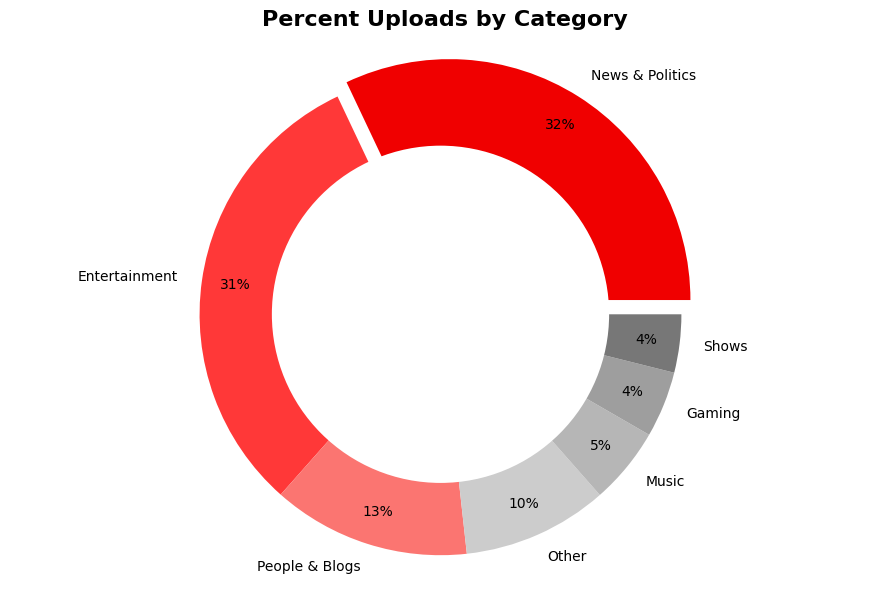

In [121]:
labels = uploads_category['Category'] 
sizes = uploads_category['Uploads (k.)']

explode = [0.07, 0, 0, 0, 0, 0, 0]

plt.figure(figsize= (9,6)) 
plt.pie(sizes, labels= labels,
autopct='%1.0f%%',
startangle=0, 
explode= explode,
colors= youtube_color_donutchart, 
pctdistance=0.86)

#

# plt.legend(title = 'Category',bbox_to_anchor=(1.1, 1), labels = labels)

plt.axis('equal') 
plt.title('Percent Uploads by Category', fontweight = 'heavy', fontsize = 16) 
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')

plt.gca().add_artist(circle) 
plt.show();

It can be seen that our conclusion in the previous part has been proven: Nearly 2/3 (63.5%) of the total Uploads are divided equally between the two categories: News & Politics and Entertainment. the New & Politics content, accounting for 32.1% (2924K Uploads) of the total number of videos posted (the difference is not too significant from the second place: Entertainment with a rate of 31.4%). The remaining categories account for a very small proportion.
- News and Politics is a content group specializing in posting videos about current events and politics including news, reports, interviews, discussions and other TV programs.The content of this section requires accuracy and continuous updating of new information, which means there is no tendency to replay them. In fact, producing content in this category often requires forces with large resources. These can be state-owned and managed organizations or high-level agencies that have an influential voice in the public for the purpose of providing reliable and useful information to viewers. This is one of YouTube's exceptions in having the highest number of videos posted regardless of views and followers.
  
- On the other hand, Entertainment is the leading category with a variety of topics such as: Music, games, news - entertainment, movies - TV shows,... This is almost a category that can be reserved for most individuals and organizations regardless of their scales. Anyone can capitalize on the content in this category because of its diversity of topics, thereby increasing the number of Video Uploads to approximately the highest. YouTube channels in this category are often heavily influenced by views and subscribers, which is almost the significant attribution to promoting and maintaining the development of channels built by individuals.
  
-  Currently, the trend of producing content in the form of short videos from TikTok, Reels of Instagram, Short-form videos of Facebook,...
This content model can generate a lot of Uploads in a short time but still attract a large number of modern viewers. Hot Tiktokers, KOLs,... are the leaders in producing short videos with low budgets, and those video's duration lasts from only 30 seconds to 1 minute but still receive many interactions on many platforms, including YouTube.

-> So, is the number of videos uploaded in the above 2 categories higher than the other categories because there are many YouTubers leveraging those 2 categories?

 